In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes

p = plt.rcParams
p["figure.dpi"] = 300

# Visualisation des données

## Fonctions

In [2]:
def get_dataset_data(annee) : 
    """
    Récupère le dataset avec toutes les informations relatives à une année
    :param annee: int
    :return: Dataframe
    """
    path = f"data/etatcivil{annee}_mar{annee}_csv/FD_MAR_{annee}.csv"
    return pd.read_csv(path, sep=';')

In [3]:
def get_dataset_corresp_labels(annee) : 
    """
    Récupère le dataset avec les informations sur les variables relatives à une année
    :param annee: int
    :return: Dataframe
    """
    path = f"data/etatcivil{annee}_mar{annee}_csv/Varmod_MAR_{annee}.csv"
    return pd.read_csv(path, sep=';')

## Récupération des données

In [4]:
df_2018 = get_dataset_data(2018)
df_2019 = get_dataset_data(2019)

df_corresp_labels_2018 = get_dataset_corresp_labels(2018)
df_corresp_labels_2019 = get_dataset_corresp_labels(2019)

<ipython-input-4-1d90c98f10a7>:1: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  df_2018 = get_dataset_data(2018)
<ipython-input-4-1d90c98f10a7>:2: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  df_2019 = get_dataset_data(2019)


In [5]:
df_2018.head()

,AMAR,ANAIS1,ANAIS2,DEPDOM,DEPMAR,DEPNAIS1,DEPNAIS2,ETAMAT1,ETAMAT2,INDNAT1,INDNAT2,JSEMAINE,MMAR,NBENFCOM,SEXE1,SEXE2,TUCOM,TUDOM
0,2018,1999,1999,99,01,99,99,1,1,2,2,6,11,N,M,F,NaN,9
1,2018,1987,1987,99,01,70,99,1,1,1,2,6,8,N,M,F,NaN,9
2,2018,1990,1990,99,01,74,01,1,1,1,1,6,7,N,M,F,NaN,9
3,2018,1985,1986,99,01,69,99,1,1,1,2,6,12,N,M,F,NaN,9
4,2018,1985,1986,99,01,69,99,1,1,1,2,6,12,N,M,F,NaN,9


In [6]:
df_2019.head()

,AMAR,ANAIS1,ANAIS2,DEPDOM,DEPMAR,DEPNAIS1,DEPNAIS2,ETAMAT1,ETAMAT2,INDNAT1,INDNAT2,JSEMAINE,MMAR,NBENFCOM,SEXE1,SEXE2,TUCOM,TUDOM
0,2019,1979,1979,99,01,99,01,4,4,2,1,6,12,N,M,F,NaN,9
1,2019,1990,1990,99,01,99,30,1,1,2,1,2,12,N,M,F,NaN,9
2,2019,1992,1995,99,01,75,01,1,1,1,1,6,8,N,M,F,NaN,9
3,2019,1982,1989,99,01,99,72,1,1,2,1,6,8,N,M,F,NaN,9
4,2019,1989,1988,99,01,69,01,1,1,1,1,6,6,N,M,F,NaN,9


In [7]:
df_corresp_labels_2018.head()

,COD_VAR,LIB_VAR,COD_MOD,LIB_MOD,TYPE_VAR,LONG_VAR
0,AMAR,Année du mariage,2018,2018,CHAR,4
1,ANAIS1,Année de naissance du conjoint 1,1920,1920,CHAR,4
2,ANAIS1,Année de naissance du conjoint 1,1921,1921,CHAR,4
3,ANAIS1,Année de naissance du conjoint 1,1922,1922,CHAR,4
4,ANAIS1,Année de naissance du conjoint 1,1923,1923,CHAR,4


In [8]:
df_corresp_labels_2019.head()

,COD_VAR,LIB_VAR,COD_MOD,LIB_MOD,TYPE_VAR,LONG_VAR
0,AMAR,Année du mariage,2019,2019,CHAR,4
1,ANAIS1,Année de naissance du conjoint 1,1921,1921,CHAR,4
2,ANAIS1,Année de naissance du conjoint 1,1922,1922,CHAR,4
3,ANAIS1,Année de naissance du conjoint 1,1923,1923,CHAR,4
4,ANAIS1,Année de naissance du conjoint 1,1924,1924,CHAR,4


# Graphiques

## Grapique n° 1
***
Diagramme en barre avec la différence de mariages par mois entre 2019 et 2018 en pourcentages

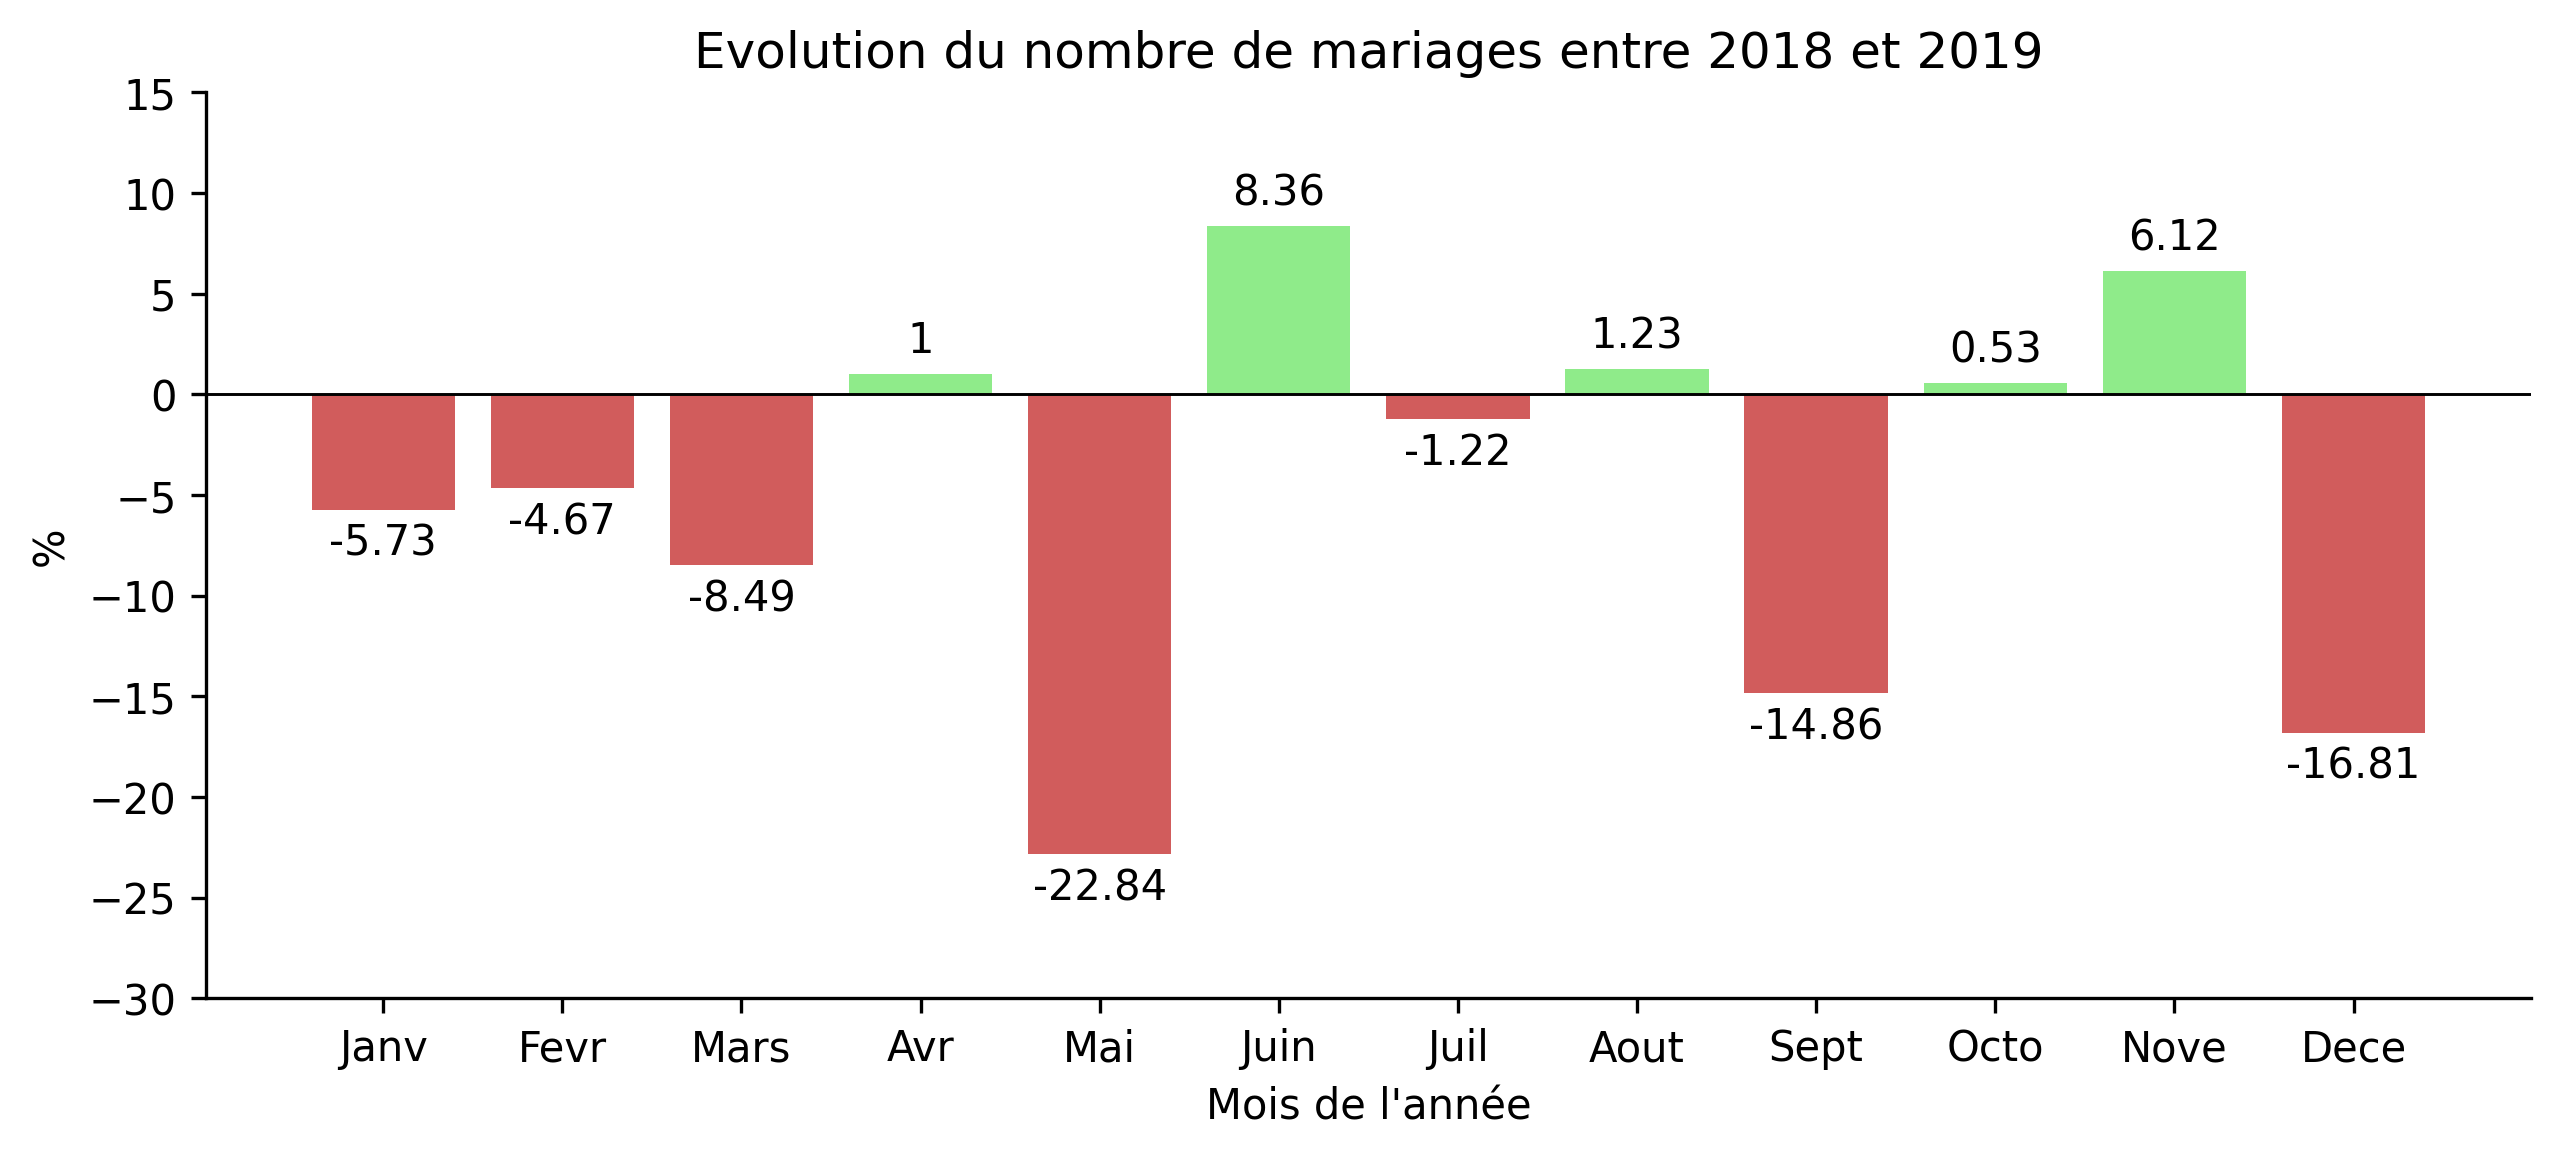

In [9]:
X = np.arange(0,13)

data = []
for i in range(1, 13) : 
    diff_nb_mariage_mois = df_2019[df_2019['MMAR'] == i].shape[0] - df_2018[df_2018['MMAR'] == i].shape[0] 
    percent = diff_nb_mariage_mois / df_2018[df_2018['MMAR'] == i].shape[0]
    data.append(percent)

fig = plt.figure(figsize=(10,4))
ax = plt.subplot()

bars = []
for i in range(len(data)) : 
    color = (0.82,0.36, 0.36,1)
    if(data[i] > 0) : 
        color =  (0.56, 0.92, 0.54, 1)
    bars.append(ax.bar(X[i], round(data[i]*100,2), color=color))

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)

mois = ['Janv', 'Fevr', 'Mars', 'Avr', 'Mai', 'Juin', 'Juil', 'Aout', 'Sept', 'Octo', 'Nove', 'Dece']
ax.set_xticks(np.arange(len(data)))
ax.set_xticklabels(mois)

ax.set_yticks([-30,-25, -20, -15, -10, -5,0,5,10, 15])

ax.set_xlabel("Mois de l'année")
ax.set_ylabel("%")

for bar in bars : 
    ax.bar_label(bar, padding=3)
plt.axhline(y=0, color = 'black',linewidth = 0.7)
plt.title("Evolution du nombre de mariages entre 2018 et 2019")
plt.show()

## Graphique n°2 
***
Diagramme pour comparer les états matrimoniaux des mariés avant le mariage, en fonction de leur sexe, en 2018 et 2019

### Fonctions

In [10]:
def get_all_from_etamat(etamat, df_annee) : 
    """
    Récupère le nombre d'hommes et de femmes ayant l'état matrimoinal 
    etamat pour une année donnée
    :param etamat: int
    :param df_annee : Dataframe
    :return: 2 int
    """
    df1 = df_annee[df_annee[f'ETAMAT1'] == etamat]
    df2 = df_annee[df_annee[f'ETAMAT2'] == etamat]

    nb_hommes =  df1[df1['SEXE1'] == 'M'].shape[0] + df2[df2['SEXE2'] == 'M'].shape[0] 
    nb_femmes =  df1[df1['SEXE1'] == 'F'].shape[0] + df2[df2['SEXE2'] == 'F'].shape[0] 
    return nb_hommes, nb_femmes


In [11]:
def get_data_tot_annee(df_annee) : 
    """
    Pour une année donnée, récupère pour chaque état matrimonial le nombre 
    d'hommes et de femmes
    :param df_annee : Dataframe
    : return : array
    """
    nb_homme_celib, nb_femme_celib = get_all_from_etamat(1, df_annee)
    nb_homme_veuf, nb_femme_veuf = get_all_from_etamat(3, df_annee)
    nb_homme_divorce, nb_femme_divorce = get_all_from_etamat(4, df_annee)

    return [[nb_homme_celib, nb_femme_celib],[nb_homme_veuf, nb_femme_veuf], [nb_homme_divorce, nb_femme_divorce]]



### Graph

In [12]:
final_data_2018 = get_data_tot_annee(df_2018)
final_data_2019 = get_data_tot_annee(df_2019)

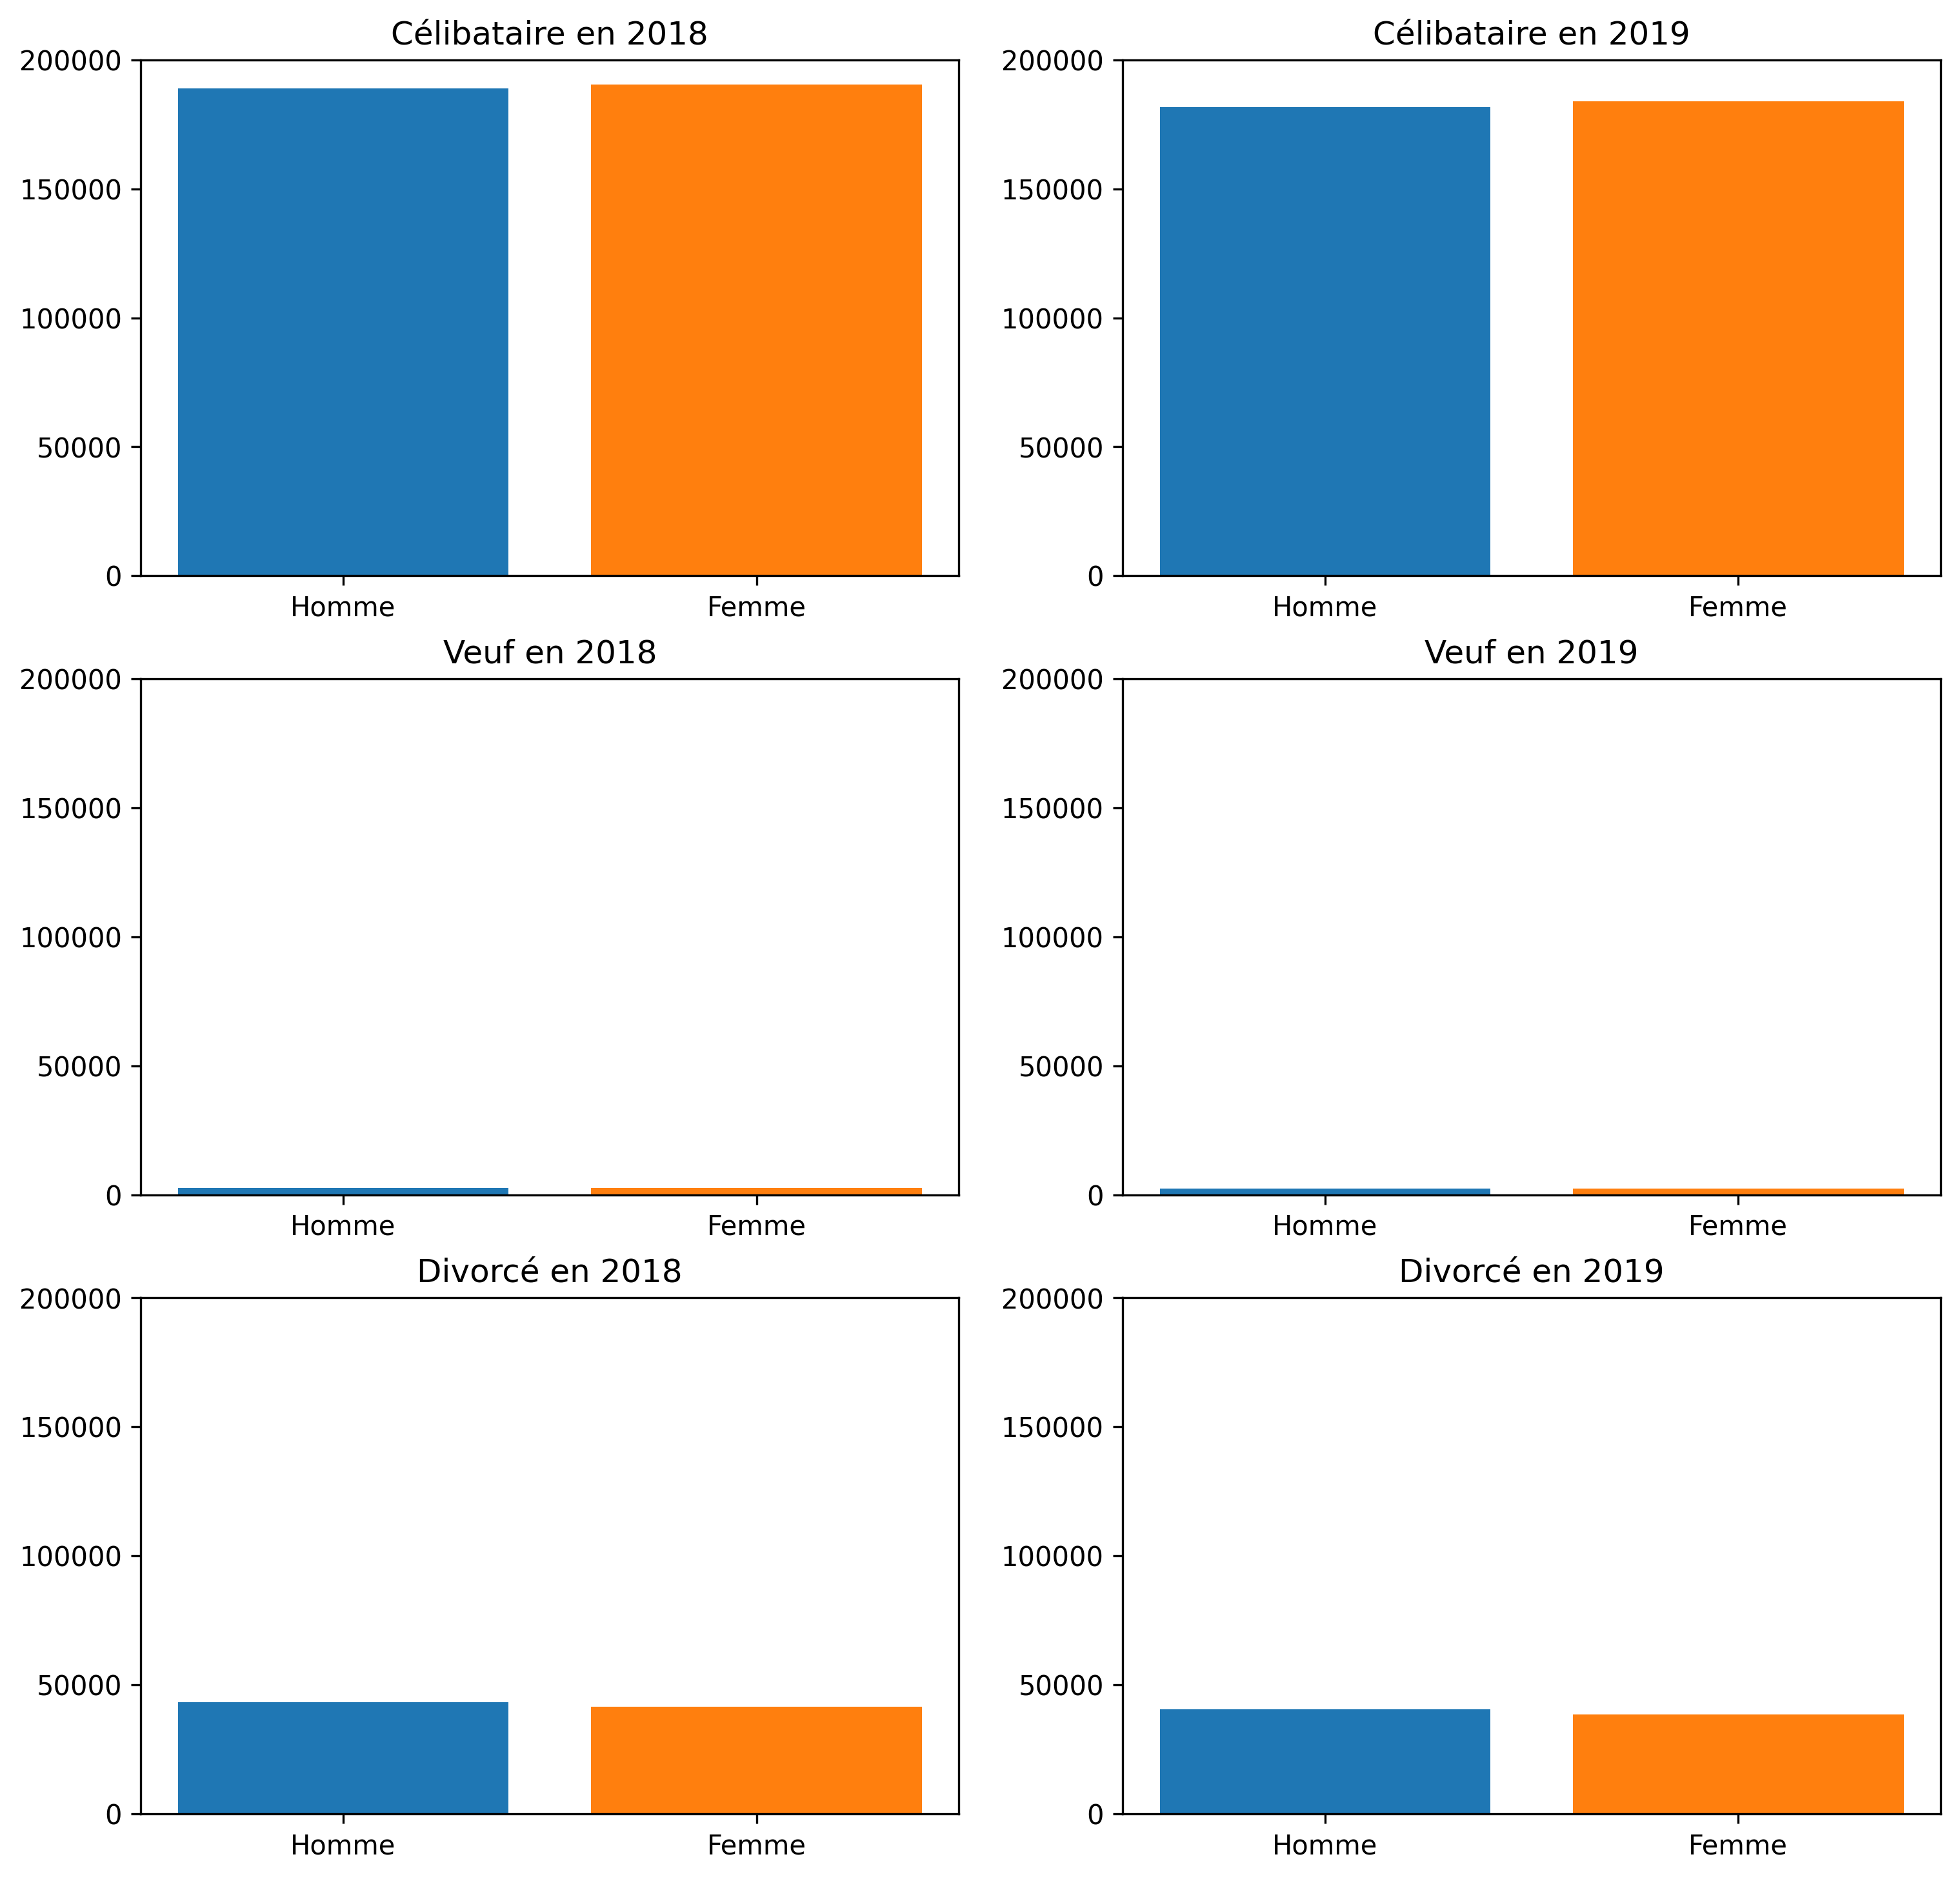

In [13]:
fig = plt.figure(figsize=(12,12))
X = np.arange(2)
etamar = ['Célibataire', 'Veuf', 'Divorcé']
annee = ['2018', '2019']

nrows, ncols = 3, 2

index = 1
for idx_row in range(nrows) : 
    for idx_col in range(ncols) : 
        ax = plt.subplot(nrows, ncols, index)
        if(idx_col % 2 == 0) : 
            ax.bar(X[0], final_data_2018[idx_row][0], color = "C0")
            ax.bar(X[1], final_data_2018[idx_row][1], color = "C1")
        else : 
            ax.bar(X[0], final_data_2019[idx_row][0], color = "C0")
            ax.bar(X[1], final_data_2019[idx_row][1], color = "C1")
        ax.set_title(f"{etamar[idx_row]} en {annee[idx_col]}")
        index += 1
        ax.set_xticks(X)
        ax.set_xticklabels(['Homme', 'Femme'])
        ax.set_yticks([0,50000,100000,150000,200000])

plt.show()

**Commentaire** : Au final, nous ne trouvions pas ce graphique très intéressant à exploiter et ne l'avons donc pas affiché sur notre rendu PDF. En effet, que ce soit d'une année à l'autre, ou même en comparant les deux sexes, les données sont assez semblables. La seule chose à noter c'est qu'il y a beaucoup plus de personnes célibataires avant le mariage que de personnes divorcées. Pour finir, il y a très peu de personnes qui se re marient une fois veuf. Seulement, nous ne savons pas l'âge des personnes étant précédemment divorcés, célibataires, ou veufs, ce qui nous a amenés à faire le graphique suivant.

## Graphique n°3
***
Graphique comparant l'âge de mariage et l'état matrimonial avant le mariage pour l'ensemble des données (2018 et 2019 réunis)

### Fonctions

In [14]:
def get_df_by_etamat(etamat, df) :
    """
    Récupère toutes les données correspondant à un état matrimonial
    et pour une année 
    :param etamat : int
    :param df : Dataframe
    : return : Dataframe
    """ 
    return df[df["ETAMAT"]==etamat]

In [15]:
def get_df_by_categ_age(categorie, df) : 
    """
    Récupère toutes les données correspondant à une catégorie d'âge
    et pour une année 
    :param categorie : string
    :param df : Dataframe
    : return : Dataframe
    """ 
    min_age = int(categorie.split("-")[0])
    max_age = int(categorie.split("-")[1])
    df_categ = df[df["AGEMAR"]>=min_age]
    df_categ = df_categ[df_categ["AGEMAR"]<max_age]
    return df_categ

In [18]:
def concat_conjoints(colonne, df) : 
    """
    Récupère les données correspondant aux deux conjoints
    pour une colonne donnée et un dataframe
    :param colonne : string
    :param df : Dataframe
    : return : array
    """ 
    tot = []
    for val in df[f'{colonne}1'] : 
        tot.append(val)
    for val in df[f'{colonne}2'] :
        tot.append(val)
    return tot


### Graph

In [16]:
df_tot = pd.concat([df_2018, df_2019])

In [17]:
df_tot = df_tot.assign(AGEMAR1=df_tot["AMAR"] - df_tot["ANAIS1"])
df_tot = df_tot.assign(AGEMAR2=df_tot["AMAR"] - df_tot["ANAIS2"])

In [19]:
etamat_tot = concat_conjoints('ETAMAT', df_tot)
age_tot = concat_conjoints('AGEMAR', df_tot)

In [20]:
df_etamat_age = pd.DataFrame({"ETAMAT" : etamat_tot, 'AGEMAR' : age_tot})

In [21]:
categs_age = [" 15-25 ", " 25-30 ", " 30-35 ", " 35-40 ", " 40-45 ", " 45-50 ", "50-55", "55-60", "60-65", "65-70", "70-75", "75-80", "80-85", "85-90", "95-100"]
etamars = {"Célibataire" : 1, "Divorcé" : 4, "Veuf" : 3}

In [22]:
data_tot = []
for etamar in etamars :
    data_etamar = [] 
    val_etamar = etamars[etamar]
    df_etamat = get_df_by_etamat(val_etamar, df_etamat_age)
    for categ in categs_age :
        df_categ = get_df_by_categ_age(categ, df_etamat)
        data_etamar.append(df_categ.shape[0]/df_etamat.shape[0])
    data_tot.append(data_etamar)
        

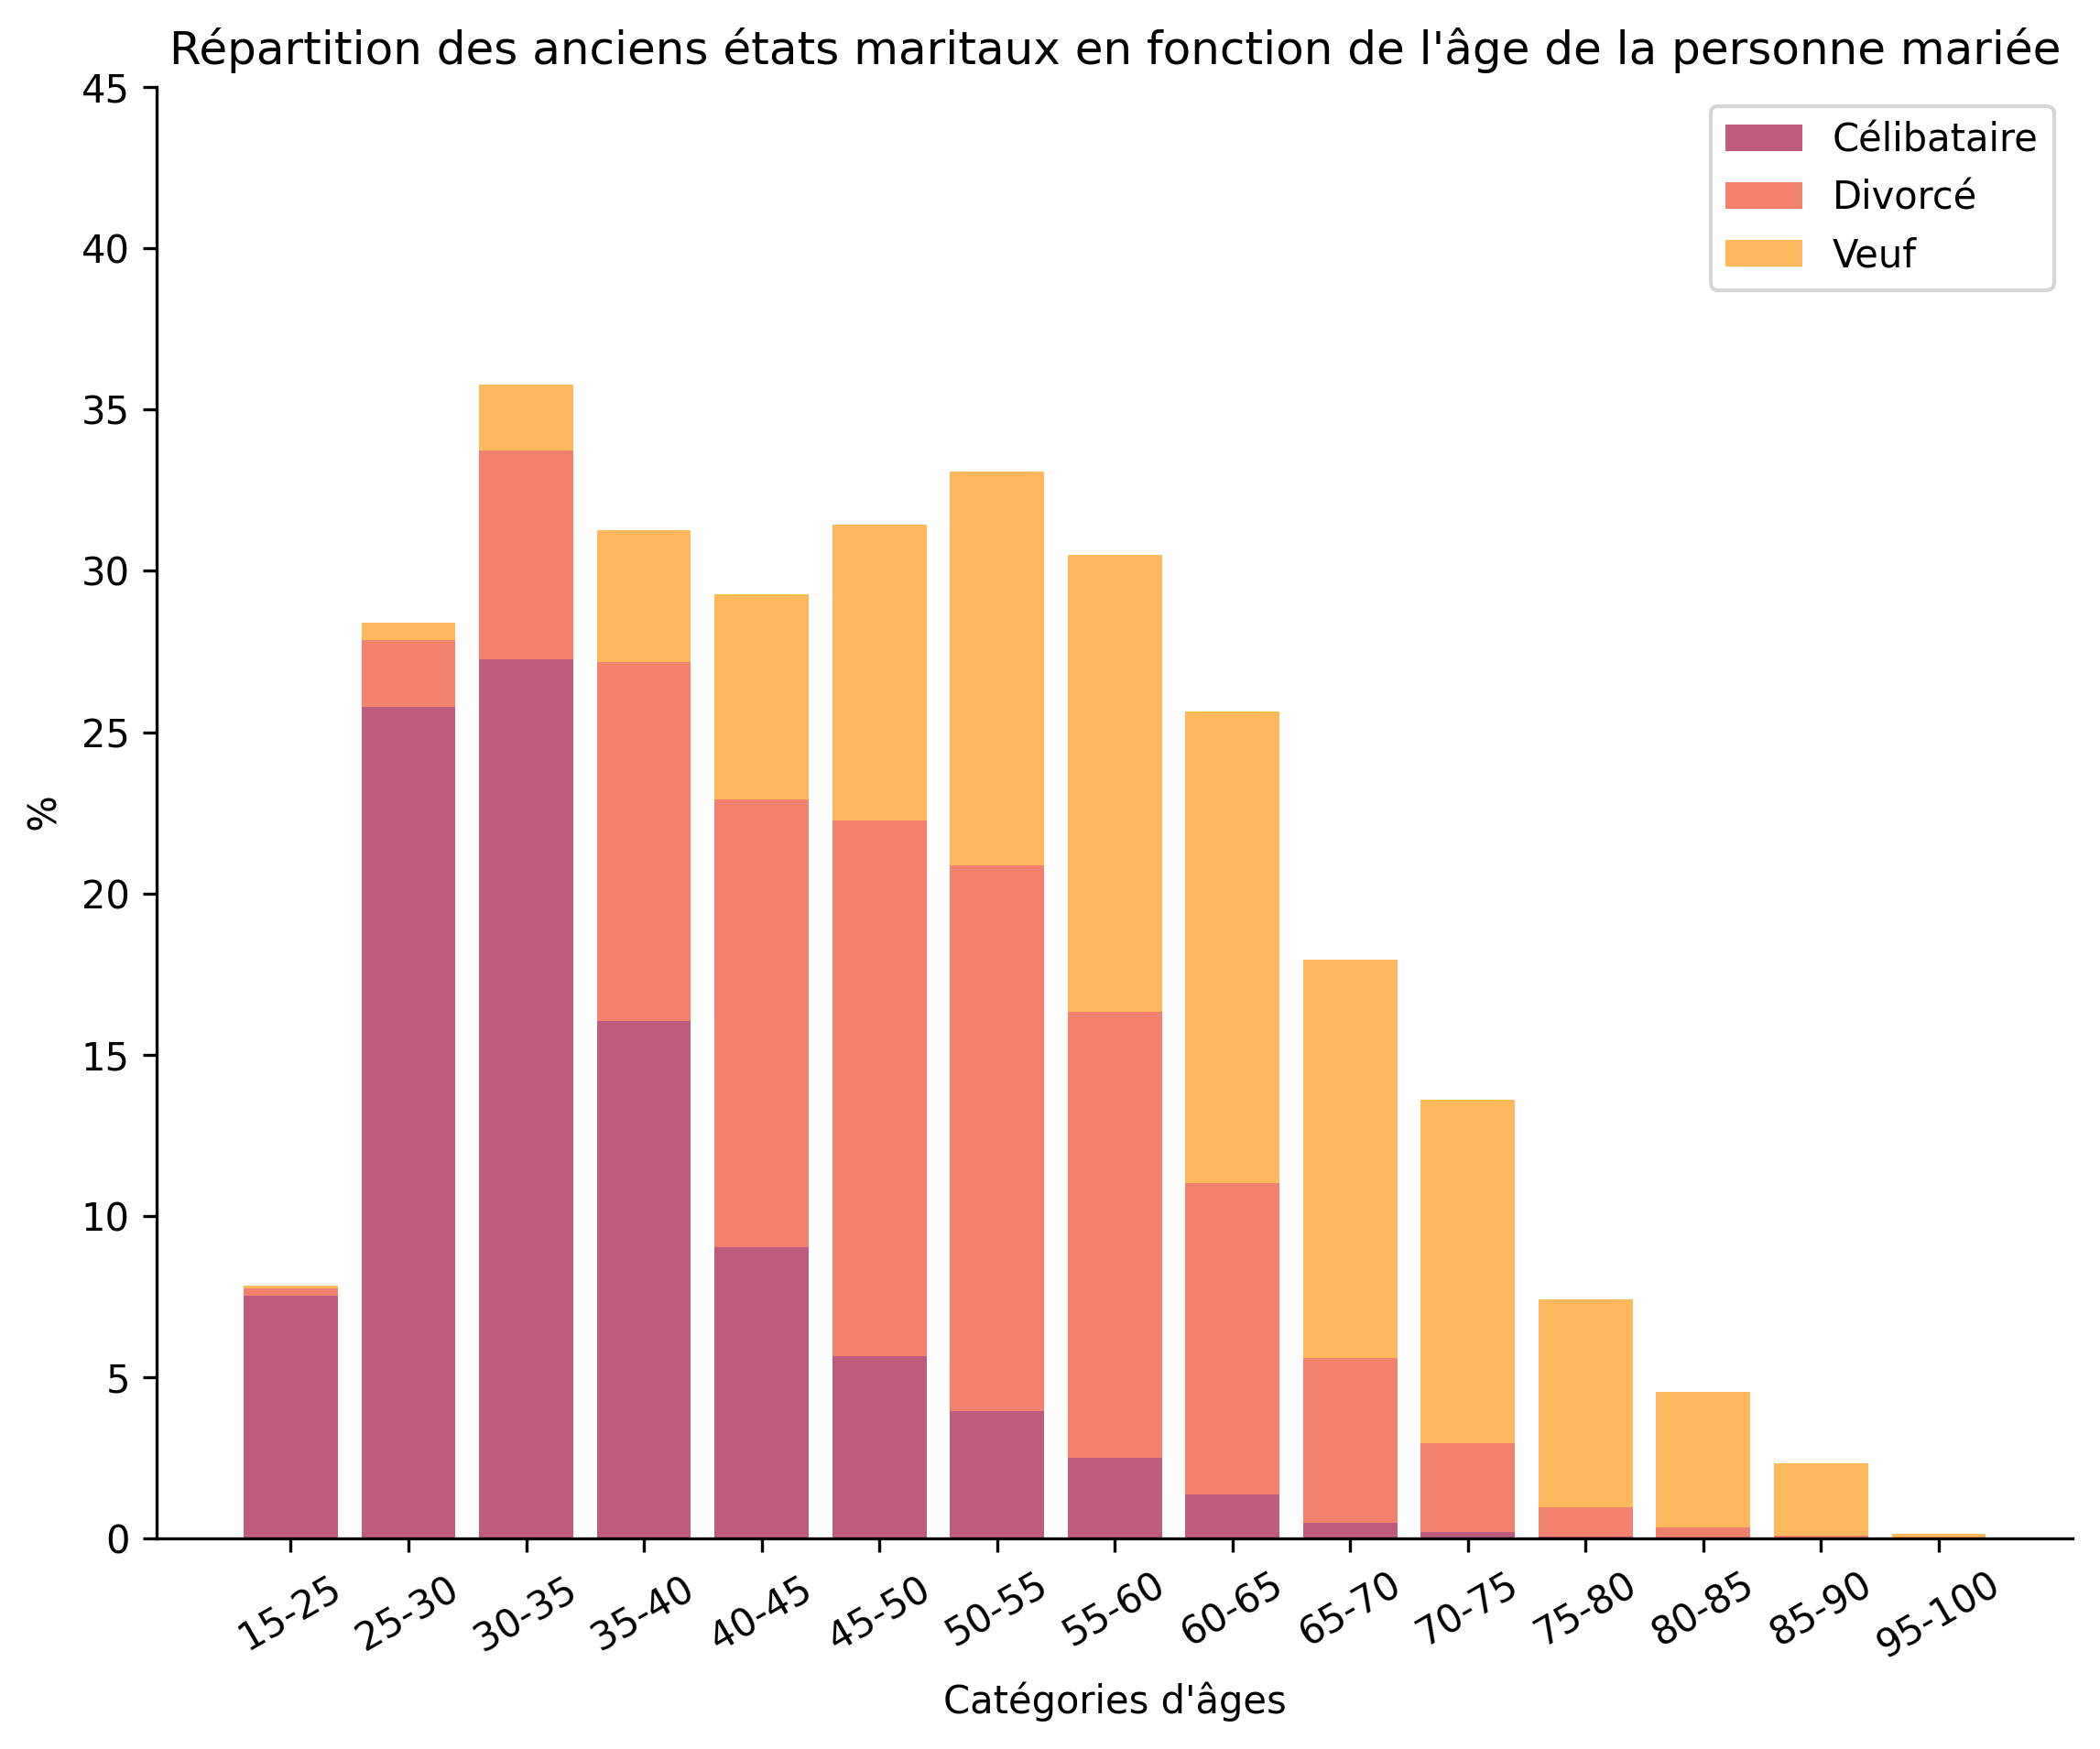

In [23]:
plt.figure(figsize=(9,7))
ax = plt.subplot()
ax.bar(categs_age,data_tot[0],color=(0.75,0.36,0.49,1),label="Célibataire")
ax.bar(categs_age,data_tot[1],color=(0.95,0.51,0.43,1),bottom=np.array(data_tot[0]),label="Divorcé")
ax.bar(categs_age,data_tot[2],color=(1,0.72,0.36,1),bottom=np.array(data_tot[0])+np.array(data_tot[1]),label="Veuf")

ax.set_xlabel("Catégories d'âges")
ax.set_ylabel(" % ")

ax.set_yticks([0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45])
ax.set_yticklabels(['0','5','10','15','20','25','30','35','40','45'])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.xticks(rotation = 30)

plt.legend(bbox_to_anchor=(1.0,1.0))
plt.title("Répartition des anciens états maritaux en fonction de l'âge de la personne mariée")
plt.show()
